In [654]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [655]:
train = pd.read_csv('../Desktop/Study/Алгоритмы анализа данных/материалы/Final Kaggle/Choose Tutor/train.csv')
test_df = pd.read_csv('../Desktop/Study/Алгоритмы анализа данных/материалы/Final Kaggle/Choose Tutor/test.csv')

In [656]:
train['choose'].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

In [657]:
train.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns 

(None, None)

In [658]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8009,8.030274,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9748,1.766883,0.0,0.00,2.0,3.00,9.0
lesson_price,10000.0,1702.4400,523.789062,200.0,1300.00,1550.0,2150.00,3950.0
qualification,10000.0,1.7243,0.798845,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3706,0.482990,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1215,0.326724,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1172,0.321675,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0591,0.235824,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0277,0.164120,0.0,0.00,0.0,0.00,1.0


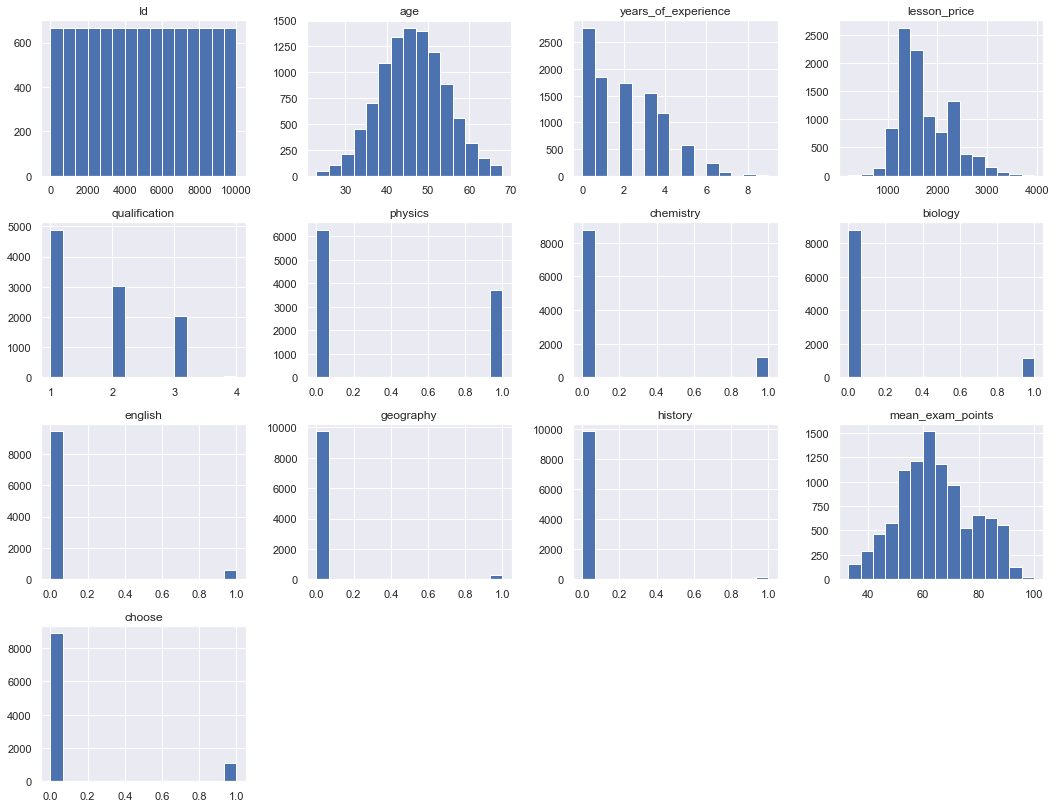

In [659]:
train.hist(figsize =(16,14),bins = 15, grid = True)
plt.show()

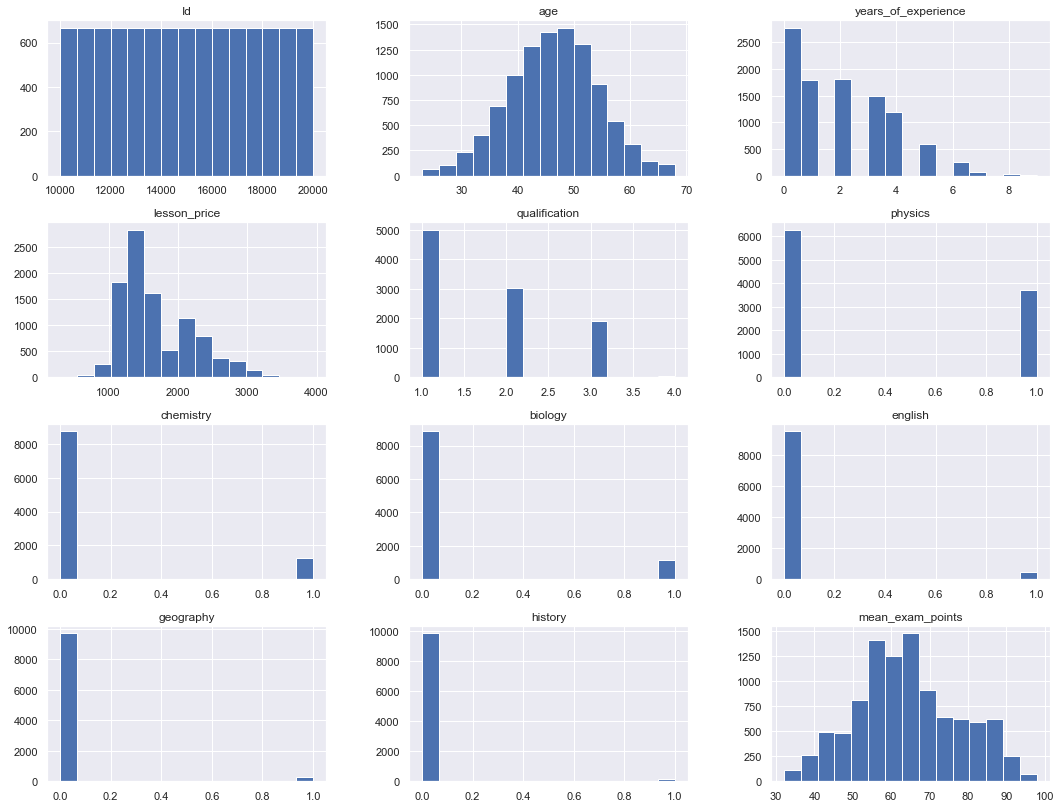

In [660]:
test_df.hist(figsize =(16,14),bins = 15, grid = True)
plt.show()

In [661]:
def plot_kde_qq_interval(data, feature):
    """
    Makes 3 plots:
    1.Builds density graph for feature in the context of target variable.
    2.QQ-plot
    3.Confidence intervals in context of target variable
    
    """
    
    sns.set(rc={"figure.figsize": (18, 12)})
    
    plt.subplot(221)
    sns.kdeplot(data[data['choose'] == 1][feature],label='Репетитор подходит', color='green')
    sns.kdeplot(data[data['choose'] == 0][feature],label='Репетитор не подходит', color='red')
    plt.xlabel(feature)
    plt.ylabel('Distribution density')
    plt.title(f'Distribution {feature} in context of target variable')
    
    plt.subplot(222)
    probplot(data[feature].sample(1000), dist='norm', plot=plt)
    plt.title(f'Q-Q plot {feature}')
    
 
    plt.show()

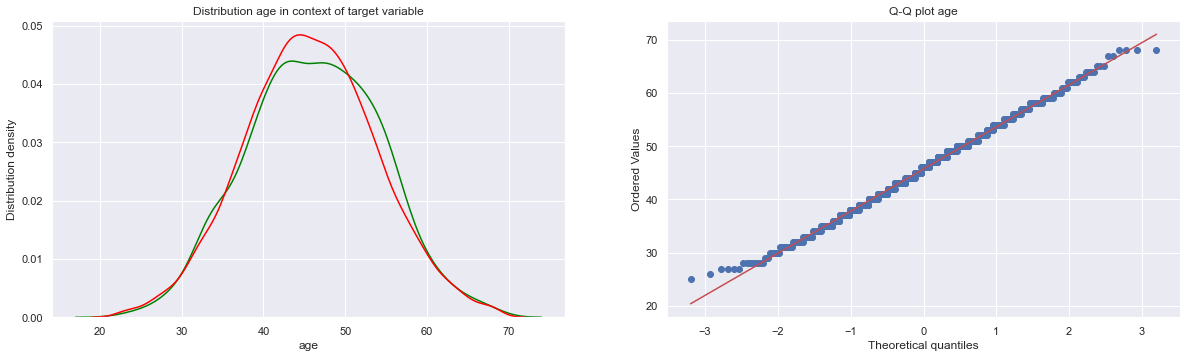

In [662]:
plot_kde_qq_interval(train, 'age')

In [663]:
target = 'choose'
y = train[target]
X = train.drop(columns=['Id', 'choose'])
test_X = test_df.drop(columns='Id')

In [664]:
def Standard(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            data[i][j] = (data[i][j] - means[j])/stds[j]
    return data

In [665]:
X = X.values
y = y.values
test_X = test_X.values

In [666]:
Standard(X)
Standard(test_X)

array([[-1.73371969,  0.00807395,  1.90046712, ..., -0.17343093,
        -0.12382046,  1.90506341],
       [-1.36019396,  2.26652127,  0.19020064, ..., -0.17343093,
        -0.12382046,  0.50485588],
       [-0.23961676,  0.00807395, -0.94997702, ..., -0.17343093,
        -0.12382046, -1.41121759],
       ...,
       [-0.23961676,  0.00807395, -0.85496222, ..., -0.17343093,
        -0.12382046, -0.08470519],
       [ 0.63194329,  1.70190944, -1.33003624, ..., -0.17343093,
        -0.12382046, -0.01101005],
       [-0.36412533, -1.12114971, -0.37988819, ..., -0.17343093,
        -0.12382046, -1.70599812]])

In [667]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [668]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [669]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [670]:
y_pred = classifier.predict(X_test)


In [671]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[1598  182]
 [ 149   71]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1780
           1       0.28      0.32      0.30       220

    accuracy                           0.83      2000
   macro avg       0.60      0.61      0.60      2000
weighted avg       0.84      0.83      0.84      2000



In [672]:
pred_proba = classifier.predict_proba(X_test)

In [673]:
classifier.fit(X,y)

DecisionTreeClassifier()

In [674]:
y_pred = classifier.predict_proba(test_X)

In [ ]:
df = pd.DataFrame(y_pred, columns = ['actual','choose'])
df['choose']

In [683]:
submis = pd.concat([test_df['Id'], df['choose']], axis = 1)

In [684]:
submis

,Id,choose
0,10000,0.0
1,10001,0.0
2,10002,0.0
3,10003,0.0
4,10004,0.0
...,...,...
9995,19995,0.0
9996,19996,0.0
9997,19997,0.0
9998,19998,1.0


In [686]:
submis.to_csv('../Desktop/predict.csv', index=None)

In [1]:
from sklearn.linear_model import LogisticRegression

In [2]:
LogisticRegression?